In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
os.chdir("/workspaces/kipack/examples")

In [17]:
import numpy as np
# from examples.linear_transport.rbm_1d_ap import run, maxwellian_vec_init
from linear_boltz.rbm_1d import run, maxwellian_vec_init

# x = np.arange(0.025, 1.025, 0.025)
# Parameters
kn = lambda x: 1.0

# cross section
omega, C = 1.0, 50 * np.exp(1.0)
smooth_delta = lambda v: np.exp(-C * v**2)

def sigma(v, w):
    tmp = (np.exp(-v**2) * smooth_delta(v**2 - w**2 + omega) 
    + np.exp(-w**2) * smooth_delta(v**2 - w**2 - omega))
    return 1 / np.sqrt(np.pi) * tmp


G = lambda x: 1.0
xmin = 0.0
xmax = 1.0
nx = 100
dx = (xmax - xmin) / nx
dt = 0.0001
nt = 2000
BC = "dirichlet"
f_l = lambda v: 0.0
f_r = lambda v: 0.0
scheme = "Euler"
# init_func = maxwellian_vec_init
init_func = lambda vmesh, rho, u, T: 0.0

In [18]:
output_ref = run(kn=kn, sigma=sigma, G=G,
                 xmin=xmin, xmax=xmax, nx=nx, dt=dt, nt=nt,
                 BC=BC, f_l=f_l, f_r=f_r,
                 coll="linear", scheme=scheme,
                 init_func=init_func)

1 dimensional collision model.
Number of velocity cells: 30.
Velocity domain: [0, 1.7724538509055159].
Collision model precomputation finished!
dt is 0.0001
2000/2000 [==============================] - 3s 1ms/step


In [19]:
output_rbm = run(kn=kn, sigma=sigma, G=G,
                 xmin=xmin, xmax=xmax, nx=nx, dt=dt, nt=nt,
                 BC=BC, f_l=f_l, f_r=f_r,
                 coll="rbm", scheme=scheme,
                 init_func=init_func)

1 dimensional collision model.
Number of velocity cells: 30.
Velocity domain: [0, 1.7724538509055159].
Collision model precomputation finished!
dt is 0.0001
2000/2000 [==============================] - 4s 2ms/step


In [20]:
output_rbm_symm = run(kn=kn, sigma=sigma, G=G,
                      xmin=xmin, xmax=xmax, nx=nx, dt=dt, nt=nt,
                      BC=BC, f_l=f_l, f_r=f_r,
                      coll="rbm_symm", scheme=scheme,
                      init_func=init_func)

1 dimensional collision model.
Number of velocity cells: 30.
Velocity domain: [0, 1.7724538509055159].
dt is 0.0001
2000/2000 [==============================] - 3s 2ms/step


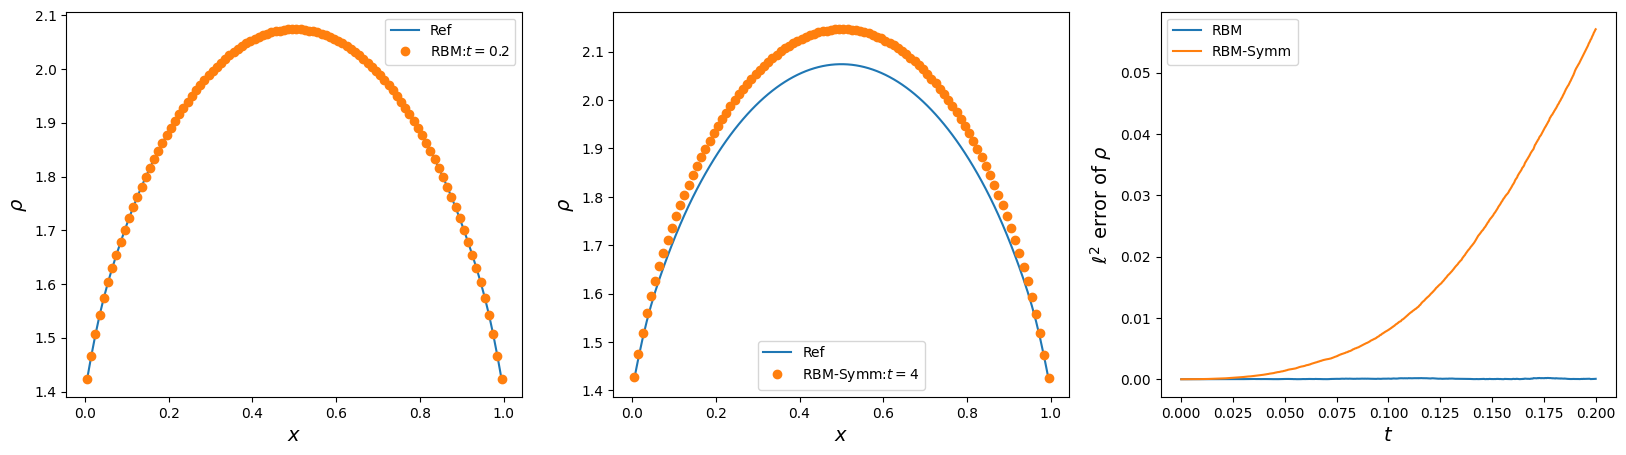

In [21]:
import numpy as np
import matplotlib.pyplot as plt

t_idx = -1

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

# ref_loaded = np.load("./data/ref.npz")
macro_ref = output_ref["macro_frames"]
# macro_ref = ref_loaded["macro_frames"]
macro_rbm = output_rbm["macro_frames"]
macro_rbm_symm = output_rbm_symm["macro_frames"]

# ref_x = ref_loaded["x"]
x = output_rbm["x"]
t = output_rbm["t"]

ax1.plot(x, macro_ref[t_idx], label="Ref")
# ax1.plot(np.concatenate([np.array([0.0]), ref_x, np.array([11.0])]), np.concatenate([np.array([0.0]), macro_ref[t_idx], np.array([0.0])]), label=r"Ref:$t=100$ with ")
# ax1.plot(x, macro_ref[t_idx], markevery=1, label=r"RBM:$t=100$")
ax1.plot(x, macro_rbm[t_idx], "o", markevery=1, label=r"RBM:$t=0.2$")
# ax1.plot(x, macro_ref[250], label=r"Ref:$t=0.05$")
# ax1.plot(x, macro_rbm[250], "o", markevery=1, label=r"RBM:$t=0.05$")
# ax1.plot(x, macro_ref[50], label=r"Ref:$t=0.01$")
# ax1.plot(x, macro_rbm[50], "s", markevery=1, label=r"RBM:$t=0.01$")
ax1.set_xlabel(r"$x$", fontsize=14)
ax1.set_ylabel(r"$\rho$", fontsize=14)
ax1.legend()

ax2.plot(x, macro_ref[t_idx], label="Ref")
# ax2.plot(x, macro_rbm_symm[t_idx], "o", markevery=1, label="RBM-Symm")
# ax2.plot(np.concatenate([np.array([0.0]), ref_x, np.array([11.0])]), np.concatenate([np.array([0.0]), macro_ref[t_idx], np.array([0.0])]), label=r"Ref:$t=100$")
ax2.plot(x, macro_rbm_symm[t_idx], "o", markevery=1, label=r"RBM-Symm:$t=4$")
# ax2.plot(x, macro_ref[250], label=r"Ref:$t=0.05$")
# ax2.plot(x, macro_rbm_symm[250], "o", markevery=1, label=r"RBM-Symm:$t=0.05$")
# ax2.plot(x, macro_ref[50], label=r"Ref:$t=0.01$")
# ax2.plot(x, macro_rbm_symm[50], "s", markevery=1, label=r"RBM-Symm:$t=0.01$")
ax2.set_xlabel(r"$x$", fontsize=14)
ax2.set_ylabel(r"$\rho$", fontsize=14)
ax2.legend()

rho_errs_rbm = [np.sqrt(np.sum((macro_rbm[t_idx] - macro_ref[t_idx]) ** 2) * dx) for t_idx in range(nt+1)]
rho_errs_rbm_symm = [np.sqrt(np.sum((macro_rbm_symm[t_idx] - macro_ref[t_idx]) ** 2) * dx) for t_idx in range(nt+1)]
ax3.plot(t, rho_errs_rbm, label="RBM")
ax3.plot(t, rho_errs_rbm_symm, label="RBM-Symm")
ax3.set_xlabel(r"$t$", fontsize=14)
ax3.set_ylabel(r"$\ell^2$ error of $\rho$", fontsize=14)
ax3.legend()

In [23]:
fig.savefig("./notebooks/linear_boltz/figs/lboltz_1d_kn1_fl0_fr0_0.2.pdf")